**Table of contents**<a id='toc0_'></a>    
- [Getting Started](#toc1_)    
- [Setting up the environment](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Getting Started](#toc0_)

In [ ]:
gcloud auth logins

In [ ]:
gcloud config set project burner-yasshaik1

# <a id='toc2_'></a>[Setting up the environment](#toc0_)

In [ ]:
# Step 1: Ensure you have virtualenv installed to install any GCP Package
pip install virtualenv

# Step 2: Create a virtual environment (replace 'myenv' with your desired environment name)
virtualenv myenv

# Step 3: Activate the virtual environment
# On Windows
myenv\Scripts\activate
# On macOS/Linux
source myenv/bin/activate

# Step 4: Upgrade pip (optional but recommended)
pip install --upgrade pip

# Step 5: Install the Google Cloud Pub/Sub package
pip install google-cloud-bigquery

# Create Dataset

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

dataset_id = 'burner-yasshaik1.dataset_sample'

dataset = bigquery.Dataset(dataset_id)
dataset.location = "us-central1"

dataset = client.create_dataset(dataset)  
print("Created dataset {}.{}".format(client.project, dataset.dataset_id))

# Create Table

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

dataset_id = 'burner-yasshaik1.dataset_sample'

table_id = 'burner-yasshaik1.dataset_sample.sample_table'

schema=[
    bigquery.SchemaField("name", "STRING"),
    bigquery.SchemaField("gender", "STRING"),
    bigquery.SchemaField("count", "INTEGER")
]

table = bigquery.Table(table_id, schema=schema)
table = client.create_table(table)  # Make an API request.
print(
    "Created table {}.{}.{}".format(table.project, table.dataset_id, table.table_id)
)


# Create and Load table to BigQuery

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

table_id = 'burner-yasshaik1.dataset_sample.employee_data'

job_config = bigquery.LoadJobConfig(
    schema=[
        bigquery.SchemaField("name", "STRING"),
        bigquery.SchemaField("gender", "STRING"),
        bigquery.SchemaField("count", "INTEGER")
    ],
    source_format=bigquery.SourceFormat.CSV, skip_leading_rows=1, autodetect=True,
)

file_path= '/home/yasshaik1/BQ/employee.txt'
source_file = open(file_path, "rb")
job = client.load_table_from_file(source_file, table_id, job_config=job_config)

job.result()  # Waits for the job to complete.

table = client.get_table(table_id)  # Make an API request.
print("Loaded {} rows and table is {}".format(table.num_rows, table_id))

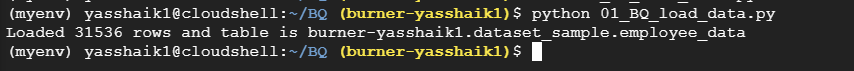

# Get table details

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

table_id = 'burner-yasshaik1.dataset_sample.employee_data'

table = client.get_table(table_id)  # Make an API request.

# View table properties
print("Got table '{}.{}.{}'.".format(table.project, table.dataset_id, table.table_id))
print("Table schema: {}".format(table.schema))
print("Table description: {}".format(table.description))
print("Table has {} rows".format(table.num_rows))

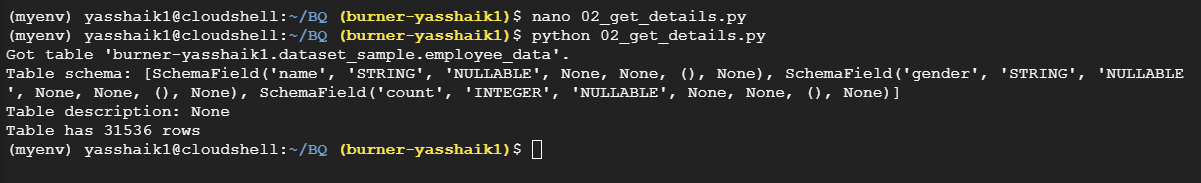

# List all the tables

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

dataset_id = 'burner-yasshaik1.dataset_sample'

tables = client.list_tables(dataset_id)  # Make an API request.

print("Tables contained in '{}':".format(dataset_id))

for table in tables:
    print("{}.{}.{}".format(table.project, table.dataset_id, table.table_id))

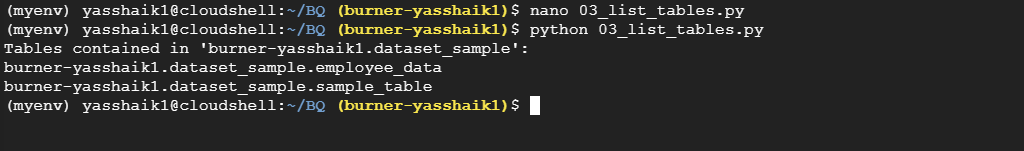

# Delete table

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

table_id = 'burner-yasshaik1.dataset_sample.employee_data'

client.delete_table(table_id, not_found_ok=True)  # Make an API request.

print("Deleted table '{}'.".format(table_id))

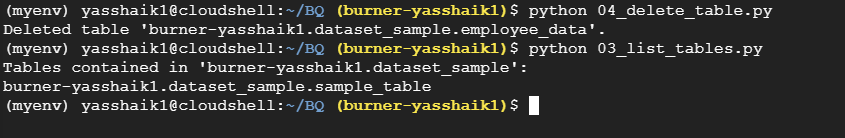